In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


<AxesSubplot:>

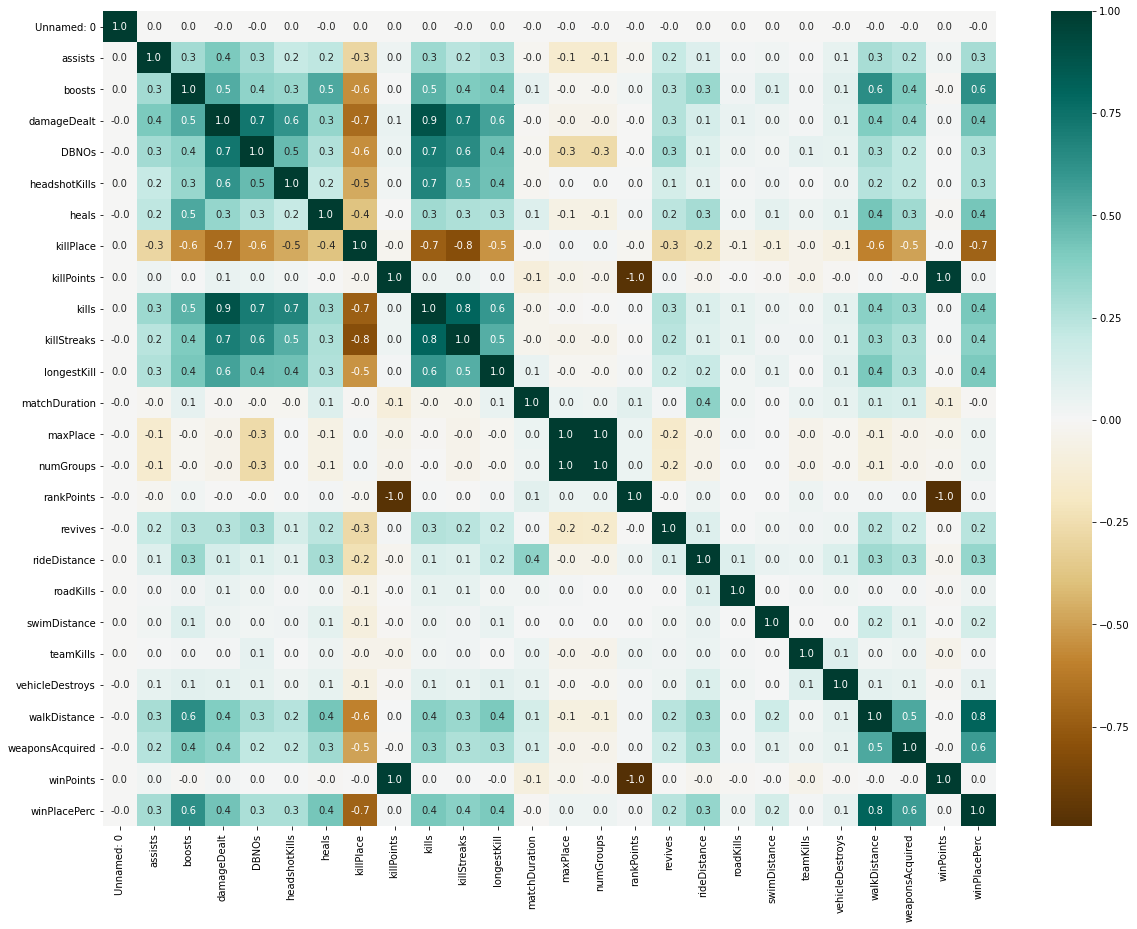

In [13]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f',cmap="BrBG")

In [3]:
df.dropna(subset = ["winPlacePerc"], inplace=True)

In [4]:
df1 = df.copy()

In [5]:
# Remove first three column from dataframe, because it gives only ID's which is not required for analysis.
df2 = df1.drop(['Unnamed: 0', 'Id', 'groupId', 'matchId'], axis=1)

In [6]:
df2.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111741 entries, 0 to 1111741
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111741 non-null  int64  
 1   boosts           1111741 non-null  int64  
 2   damageDealt      1111741 non-null  float64
 3   DBNOs            1111741 non-null  int64  
 4   headshotKills    1111741 non-null  int64  
 5   heals            1111741 non-null  int64  
 6   killPlace        1111741 non-null  int64  
 7   killPoints       1111741 non-null  int64  
 8   kills            1111741 non-null  int64  
 9   killStreaks      1111741 non-null  int64  
 10  longestKill      1111741 non-null  float64
 11  matchDuration    1111741 non-null  int64  
 12  matchType        1111741 non-null  object 
 13  maxPlace         1111741 non-null  int64  
 14  numGroups        1111741 non-null  int64  
 15  rankPoints       1111741 non-null  int64  
 16  revives          1

In [8]:
df2.drop(['headshotKills', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'roadKills', 'teamKills'], axis=1)

,assists,boosts,damageDealt,DBNOs,heals,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,1403,squad-fpp,31,29,-1,0,0.0,0.000,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,1971,squad-fpp,30,30,-1,0,0.0,0.000,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,1741,solo-fpp,96,89,1516,0,4088.0,0.000,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,1738,squad-fpp,28,27,-1,1,0.0,0.000,0,38.81,0,1515,0.5556
4,0,2,100.00,0,3,2193,solo,99,95,1482,0,918.4,0.000,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0,0,70.31,0,0,1390,squad-fpp,29,29,1472,0,0.0,0.000,0,799.80,2,0,0.3929
1111738,0,3,334.10,0,1,2030,solo-fpp,97,92,1508,0,1549.0,0.000,0,2777.00,7,0,0.8542
1111739,0,0,119.30,1,0,1909,duo,47,47,1494,0,0.0,0.000,0,60.45,1,0,0.7174
1111740,1,4,53.51,1,7,1299,squad-fpp,31,30,1627,1,3610.0,0.000,0,2209.00,4,0,0.9000


In [9]:
kill_data = df2[['headshotKills', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'roadKills', 'teamKills']]

In [10]:
kill_data.head()

,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,roadKills,teamKills
0,0,84,1437,0,0,0.000,0,0
1,0,57,1225,0,0,0.000,0,0
2,0,50,0,0,0,0.000,0,0
3,0,56,1286,0,0,0.000,0,0
4,0,31,0,1,1,7.737,0,0


## Univariate Analysis

C:\Users\newpa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='assists', ylabel='Density'>

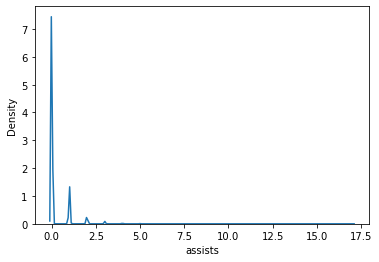

In [11]:
sns.distplot(df['assists'], hist=False, bins=1)

    We can see in above that assists has positive skewd values so we can say that after the 3 value all values can consider as a outlier.

C:\Users\newpa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='boosts', ylabel='Density'>

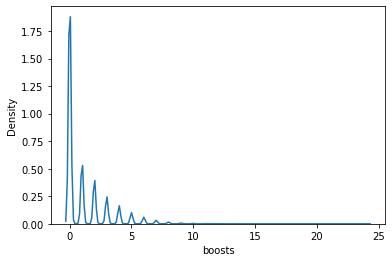

In [12]:
sns.distplot(df['boosts'], hist=False, bins=1)

    We can see that most of all the player used boost items between 0-7 times.

(array([2.20000e+01, 2.61000e+02, 6.71000e+02, 2.53100e+03, 3.09000e+03,
        4.38504e+05, 1.99798e+05, 1.24113e+05, 3.28122e+05, 1.46290e+04]),
 array([ 133. ,  343.4,  553.8,  764.2,  974.6, 1185. , 1395.4, 1605.8,
        1816.2, 2026.6, 2237. ]),
 <BarContainer object of 10 artists>)

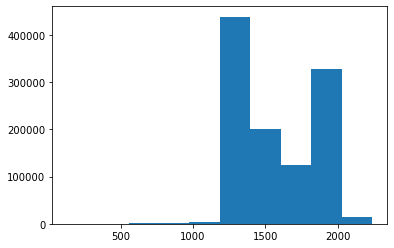

In [30]:
plt.hist(df['matchDuration'])

(array([1.068109e+06, 3.715900e+04, 5.309000e+03, 9.520000e+02,
        1.460000e+02, 4.100000e+01, 1.800000e+01, 2.000000e+00,
        4.000000e+00, 1.000000e+00]),
 array([ 0. ,  7.3, 14.6, 21.9, 29.2, 36.5, 43.8, 51.1, 58.4, 65.7, 73. ]),
 <BarContainer object of 10 artists>)

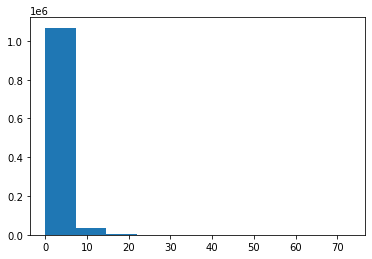

In [31]:
plt.hist(df['heals'])

<AxesSubplot:>

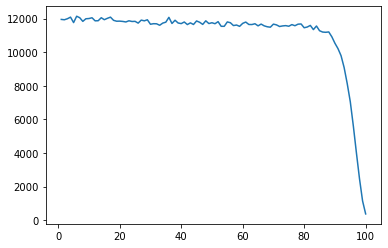

In [37]:
df['killPlace'].value_counts().sort_index().plot.line()

<AxesSubplot:>

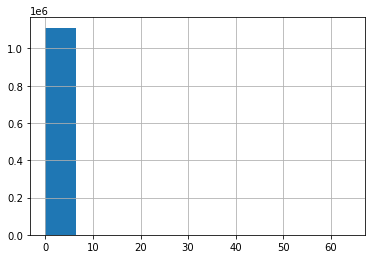

In [38]:
df['headshotKills'].hist()

## Bivariate Analysis

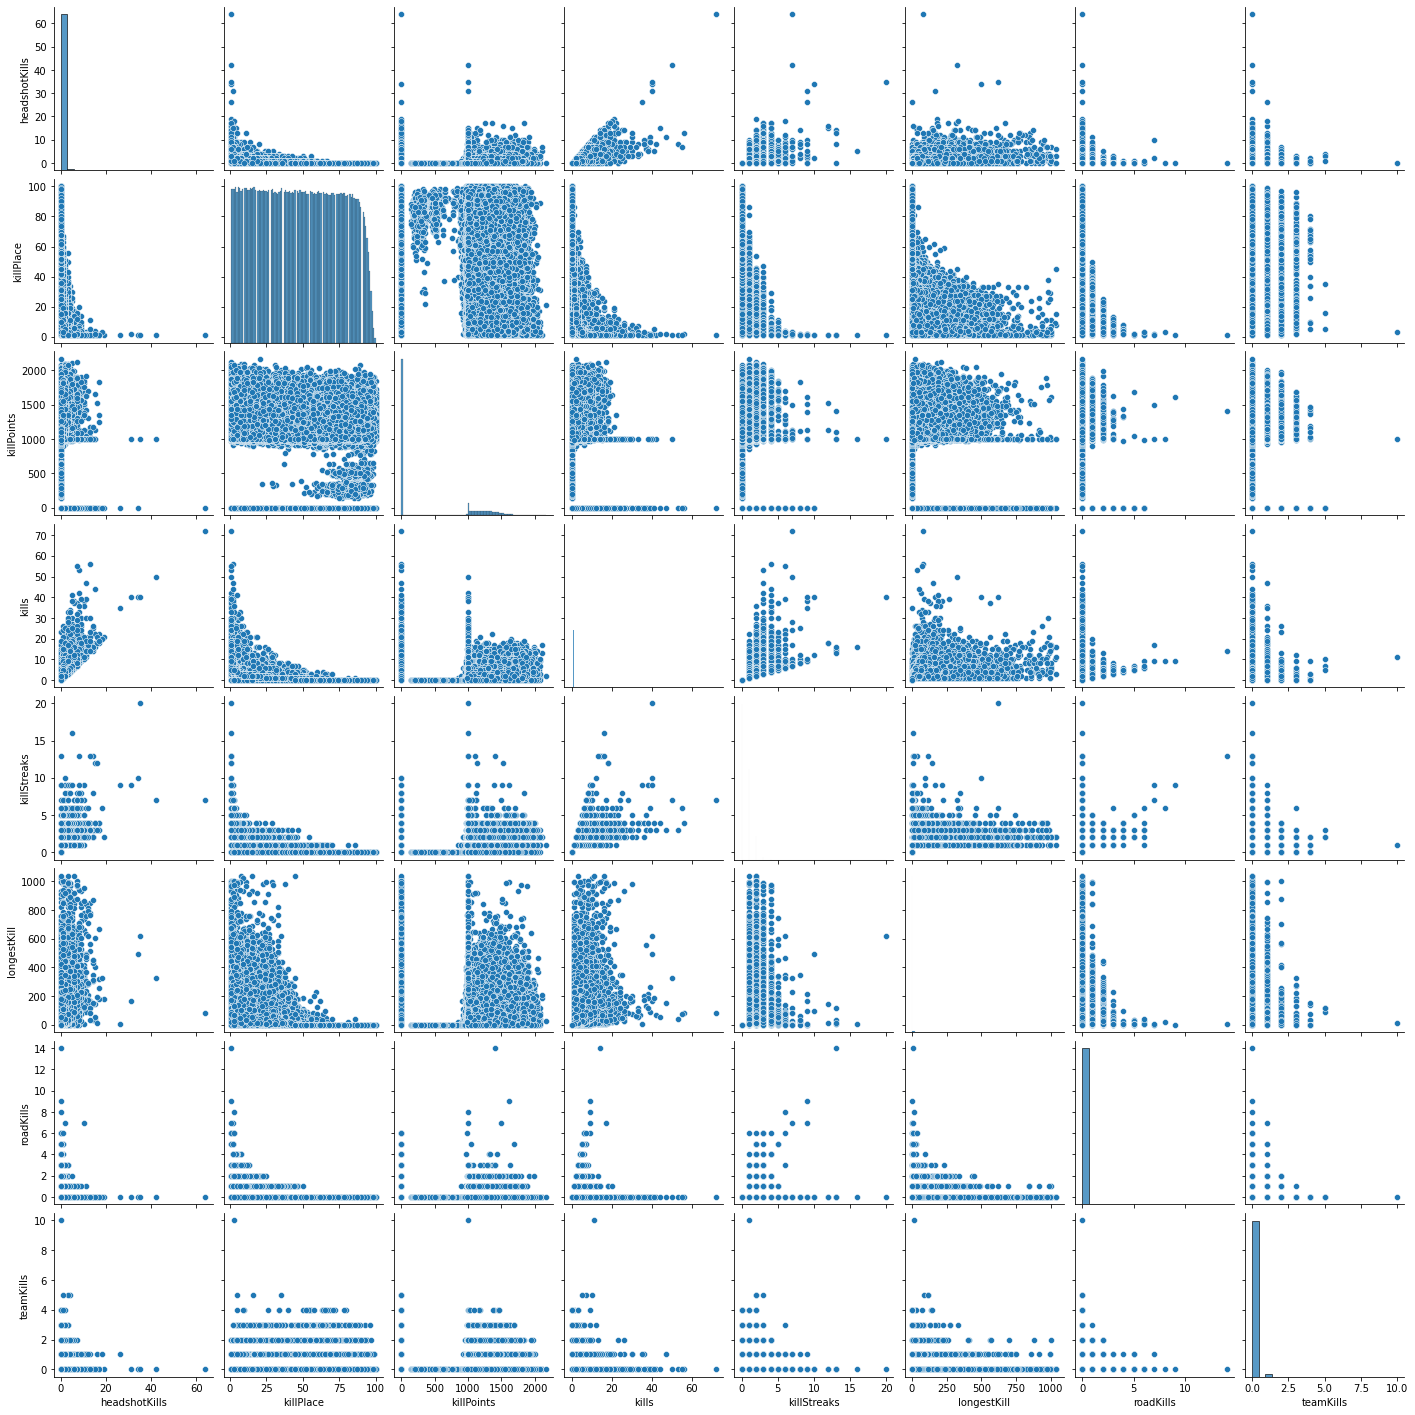

In [14]:
sns.pairplot(data=kill_data)

<AxesSubplot:>

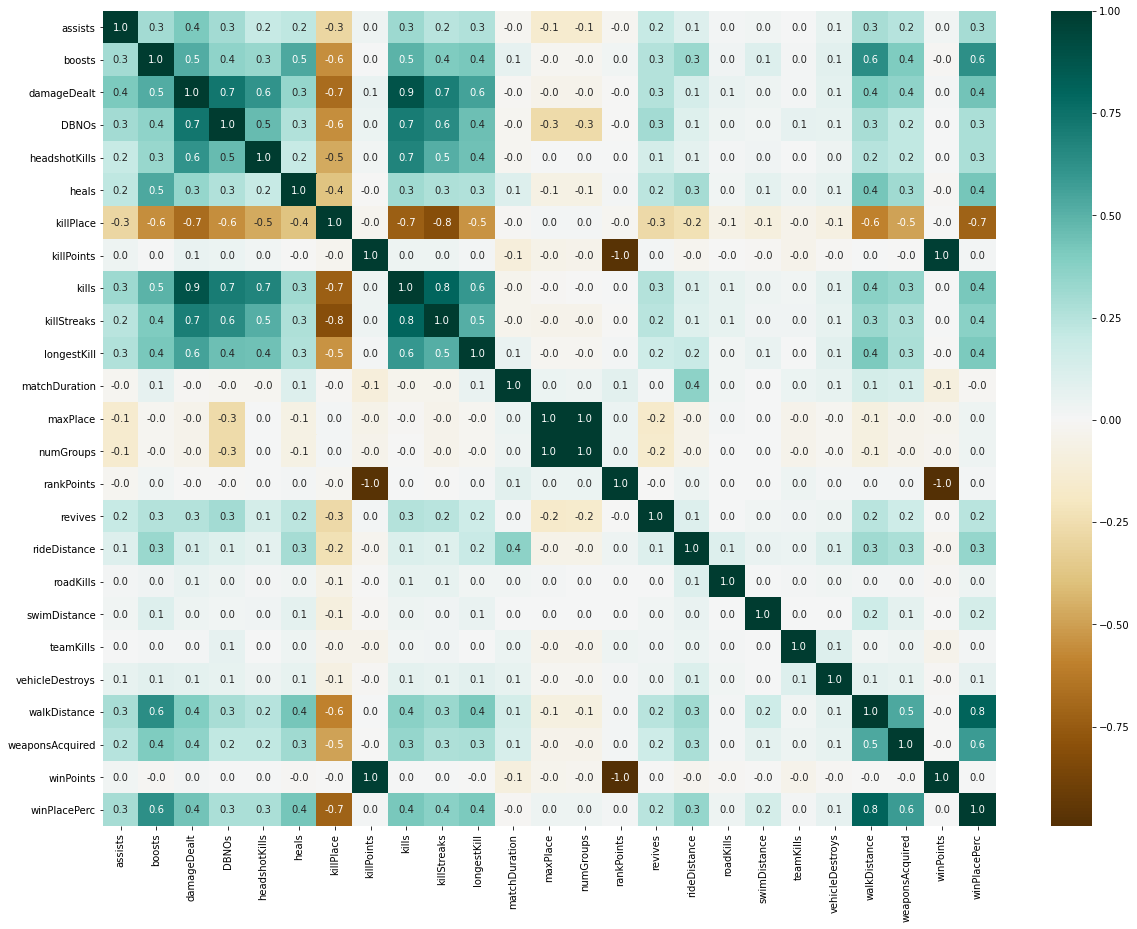

In [15]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df2.corr(), annot=True, fmt= '.1f',cmap="BrBG")

In [18]:
df2.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [19]:
df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133853
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

<AxesSubplot:xlabel='matchType', ylabel='damageDealt'>

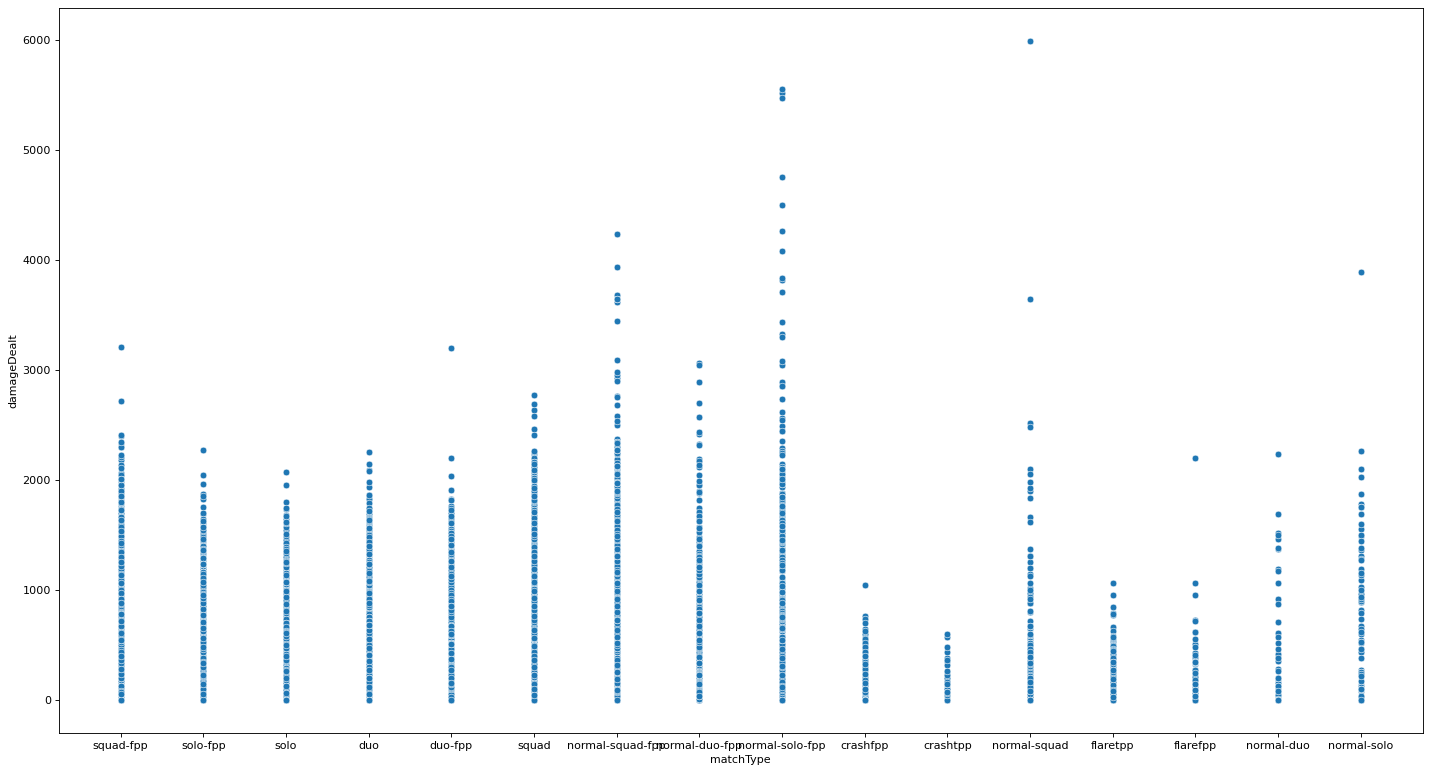

In [20]:
from matplotlib.pyplot import figure

figure(figsize=(22, 12), dpi=80)

sns.scatterplot(data=df2, x='matchType', y='damageDealt')

        In above graph analyze that carshfpp, crashtpp, flaretpp, flarefpp match type has lowest damageDealt and normal-solo-fpp, normal-squad-fpp, sqad-fpp has more damageDealt